In [ ]:
#Kullanılacak gerekli kütüphaneler ve fonksiyonlar çekildi
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from keras.utils.np_utils import to_categorical

In [ ]:
#veri keras.datasets içinden çekildi, normalize edildi test ve eğitim kısımları ayrıldı.
def preprocess():
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
  train_images, test_images = train_images / 255.0, test_images / 255.0
  return (train_images, train_labels), (test_images, test_labels)


In [ ]:
#test ve eğitim kısımları oluşturuldu.
(train_images, train_labels), (test_images, test_labels) = preprocess()


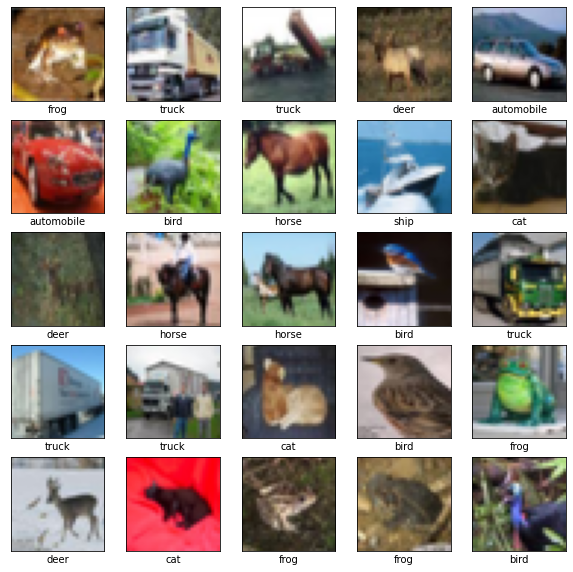

In [ ]:
#Sınıf isimleri verildi, sınıflara ait örnekler çizdirildi. 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#eğitim ve test verilerinin sınıf bilgileri vektör haline getirildi
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
#model tanımlanıyor
def define_model():
	model = Sequential() #ardışık model
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))) #2 boyutlu konvolüsyon katmanı eklendi.
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) #2 boyutlu konvolüsyon katmanı eklendi.
	model.add(MaxPooling2D((2, 2))) #maksimum pooling yapan katman eklendi
	model.add(Flatten()) # veriler sınıflandırmada kullanılmak üzere vektör haline getirildi
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) #yoğun bir katman eklendi, 128 nörondan oluşuyor. Aktivasyonu fonksiyonu ReLU
	model.add(Dense(10, activation='softmax')) #Çıkış katmanı eklendi, aktivasyon fonksiyonu softmax.
	# compile model
	opt = tf.keras.optimizers.SGD(lr=0.01,momentum=0.9) #modele ilişkin algoritma SGD olarak belirlendi, öğrenme hızı ve momentum terimi katsayısı atandı.
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #loss fonksiyonu belirlenip model çalıştırılmaya hazır hale getirildi.
	return model

In [ ]:
#model çalıştırıldı
model = define_model()

In [ ]:
#modele ait bilgilerin özeti
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________

In [ ]:
#eğitim sürecinde loss ve accuracy değişimi bastırıldı.
history = model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 156s 99ms/step - loss: 1.6945 - accuracy: 0.3843
Epoch 2/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.0657 - accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.8422 - accuracy: 0.7057
Epoch 4/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.6660 - accuracy: 0.7633
Epoch 5/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.5012 - accuracy: 0.8229
Epoch 6/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.3585 - accuracy: 0.8744
Epoch 7/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.2524 - accuracy: 0.9115
Epoch 8/10
1563/1563 [==============================] - 148s 95ms/step - loss: 0.2016 - accuracy: 0.9302
Epoch 9/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.1547 - accuracy: 0.9461
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
#Ağ test edildi
def test(model,test_data,train_targets):
  a=model.evaluate(test_data,test_targets,verbose=2)
  print(a)

313/313 - 7s - loss: 1.9434 - accuracy: 0.6428
0.642799973487854 1.9433724880218506


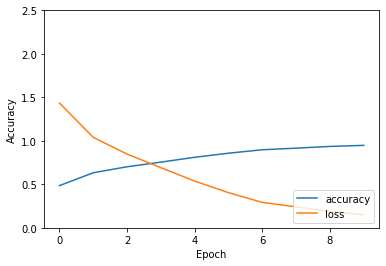

In [ ]:
#eğitim sürecine ilişkin değişimler çizdirildi.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc,test_loss)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Confussion matrisi çizdirildi
def cm(test_targets,model,cat_list):
  y_pred = model.predict(test_images)
  y_pred_num = y_pred.argmax(1)
  print(y_pred_num)
  y_test_num = test_targets.argmax(1)
  print(y_test_num)
  cm = confusion_matrix(y_true=y_test_num, y_pred=y_pred_num)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cat_list)
  disp.plot(xticks_rotation='vertical') 

[3 1 0 ... 5 1 7]
[3 8 8 ... 5 1 7]


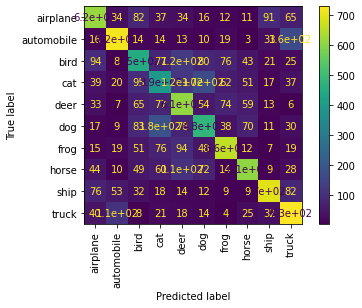

In [ ]:
cm(test_labels,model,class_names)